# Import

In [1]:
from _data_import_and_cleaning import *

,customer_id,first_payment_date,channel,payment_month,first_payment_month,payment_method_id,total_transactions,total_volume,fixed_rate,variable_rate,fixed_rate_comission,variable_rate_comission,total_comission
0,5568.0,2020-03-03,2.0,2020-03-01,2020-03-01,3.0,2.0,112.17,0.29,0.0,0.58,0.0,0.58
1,5568.0,2020-03-03,2.0,2020-04-01,2020-03-01,3.0,3.0,236.86,0.29,0.0,0.87,0.0,0.87
2,5568.0,2020-03-03,2.0,2020-05-01,2020-03-01,3.0,2.0,100.13,0.29,0.0,0.58,0.0,0.58
3,5568.0,2020-03-03,2.0,2020-06-01,2020-03-01,3.0,4.0,20.88,0.29,0.0,1.16,0.0,1.16
4,6763.0,2020-03-05,2.0,2020-03-01,2020-03-01,3.0,4.0,48.40,0.29,0.0,1.16,0.0,1.16


In [2]:
palette

[(0.3280276816608997, 0.6805074971164936, 0.6802768166089965),
 (0.7477124183006538, 0.8980392156862746, 0.6274509803921569),
 (0.998077662437524, 0.9992310649750096, 0.7460207612456747),
 (0.9934640522875817, 0.7477124183006535, 0.4352941176470587),
 (0.9139561707035756, 0.36239907727797, 0.27935409457900806)]

In [3]:
for x in [df_org, df_methods, df_payments]:
    display(x.head())

,customer_id,first_payment_date,channel
0,5568,2020-03-03,2
1,6763,2020-03-05,2
2,6816,2020-06-04,2
3,22350,2020-03-24,2
4,40800,2020-01-27,2


,payment_method_id,fixed_rate,variable_rate
0,3,0.29,0.000
1,11,0.25,0.018
2,17,0.39,0.000
3,19,0.25,0.000


,customer_id,payment_month,payment_method_id,total_transactions,total_volume
0,3120659,2020-01-01,3,241,2543.28
1,3627499,2020-01-01,3,430,27037.00
2,3611429,2020-01-01,3,117,6100.00
3,3772639,2020-01-01,3,27,720.56
4,3789659,2020-01-01,3,15,440.35


# Research

In [4]:
# Let's form the df with features
df_k = (
    df
    .groupby(['customer_id'])
    .agg(
        sum_total_transactions = ('total_transactions', 'sum'),
        sum_total_volume = ('total_volume', 'sum'),
    )
    .reset_index()
    .merge(
        (
            pd.read_csv('./datasets/organizations_contribution.csv')
            [['customer_id', 'n_months', 'comission_per_month']]
        ),
        on='customer_id',
        how='left'
    )
    .assign(
        transactions_per_month = lambda x: x.sum_total_transactions / x.n_months,
        volume_per_month = lambda x: x.sum_total_volume / x.n_months
    )
    [['customer_id', 'transactions_per_month', 'volume_per_month', 'comission_per_month']]
)

df_k

,customer_id,transactions_per_month,volume_per_month,comission_per_month
0,5568.0,2.750000,117.510000,0.7975
1,6763.0,1.250000,15.125000,0.3625
2,6816.0,1.000000,302.500000,0.2900
3,22350.0,0.750000,11.250000,0.2175
4,40800.0,195.833333,6015.093333,72.6256
...,...,...,...,...
10093,4496799.0,2.000000,33.700000,0.5800
10094,4498219.0,2.000000,2.010000,0.5800
10095,4498909.0,3.000000,26.950000,0.8700
10096,4498969.0,1.000000,210.000000,0.2900


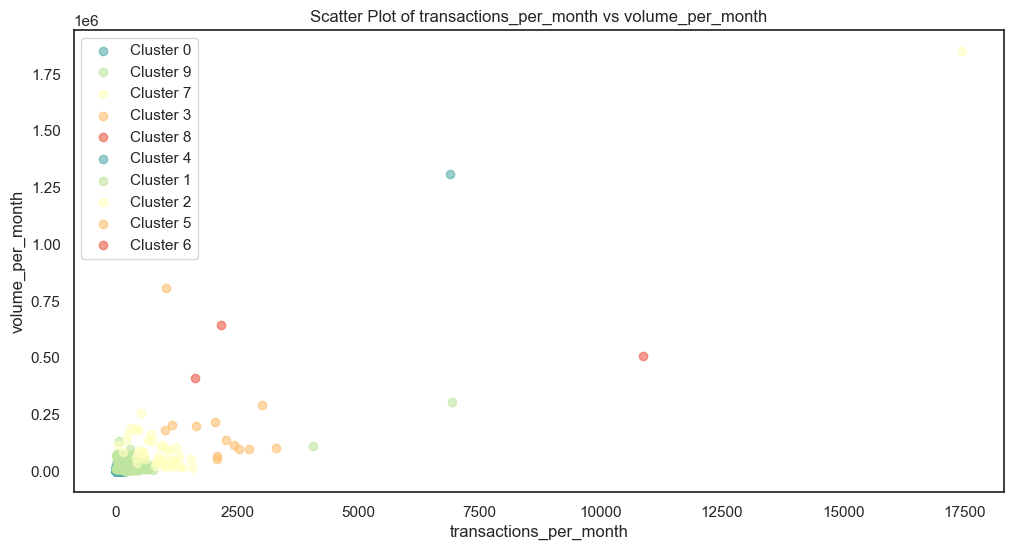

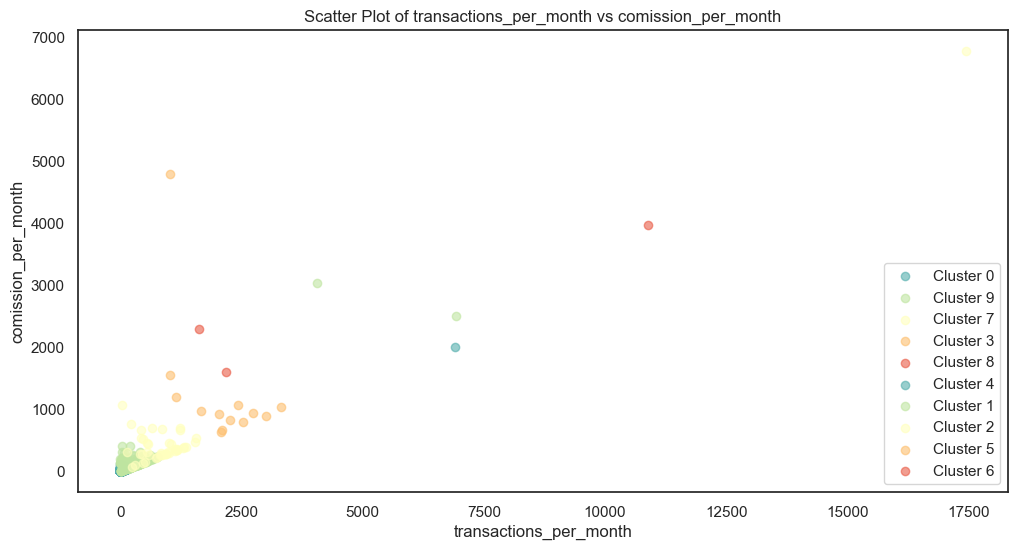

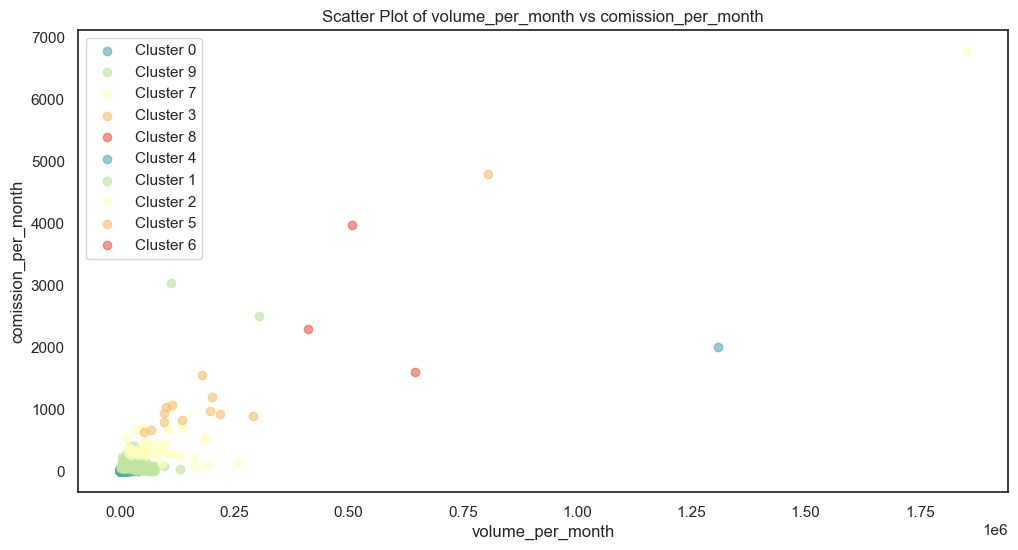

,customer_id,transactions_per_month,volume_per_month,comission_per_month,cluster
0,5568.0,2.750000,117.510000,0.7975,0
1,6763.0,1.250000,15.125000,0.3625,0
2,6816.0,1.000000,302.500000,0.2900,0
3,22350.0,0.750000,11.250000,0.2175,0
4,40800.0,195.833333,6015.093333,72.6256,9
...,...,...,...,...,...
10093,4496799.0,2.000000,33.700000,0.5800,0
10094,4498219.0,2.000000,2.010000,0.5800,0
10095,4498909.0,3.000000,26.950000,0.8700,0
10096,4498969.0,1.000000,210.000000,0.2900,0


In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import itertools

features = df_k.copy().drop(columns=['customer_id'])
customer_ids = df_k['customer_id']

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=10, random_state=42)
df_k['cluster'] = kmeans.fit_predict(features_scaled)

feature_columns = [x for x in features.columns if x != 'cluster']
feature_pairs = list(itertools.combinations(feature_columns, 2))

for x_feature, y_feature in feature_pairs:
    plt.figure(figsize=(12, 6))
    for cluster in df_k['cluster'].unique():
        clustered_data = df_k[df_k['cluster'] == cluster]
        plt.scatter(clustered_data[x_feature], clustered_data[y_feature], label=f'Cluster {cluster}', alpha=0.6)
    
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.title(f'Scatter Plot of {x_feature} vs {y_feature}')
    plt.legend()
    plt.show()

df_k

In [6]:
df_k.groupby('cluster')['customer_id'].count().sort_values(ascending=False)

cluster
0    9754
9     281
7      43
3      12
1       2
6       2
2       1
4       1
5       1
8       1
Name: customer_id, dtype: int64

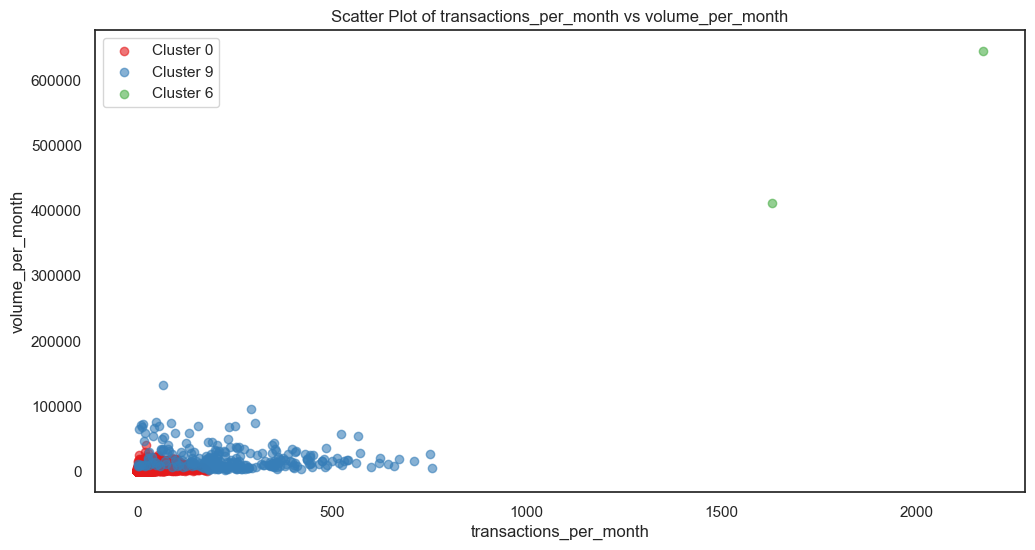

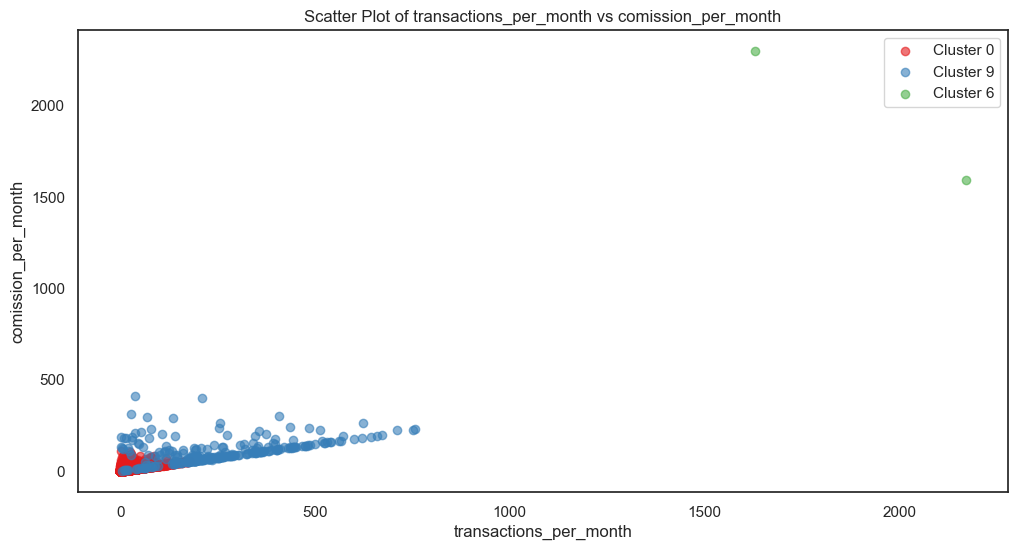

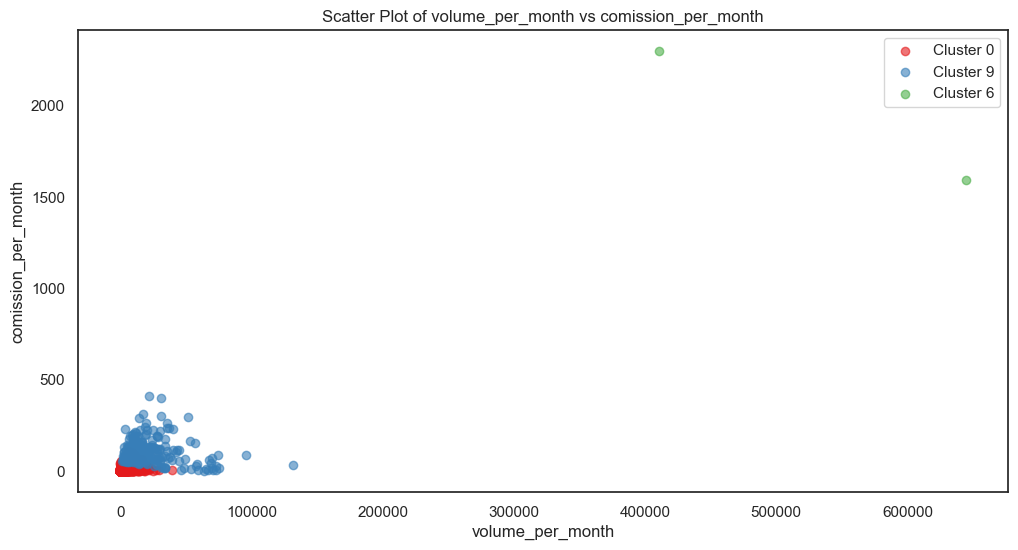

In [7]:
palette = sns.color_palette("Set1", 10)
sns.set_theme(style='white', palette=palette)

target_clusters = [0,9,6]

for x_feature, y_feature in feature_pairs:
    plt.figure(figsize=(12, 6))
    for cluster in target_clusters:
        clustered_data = df_k[df_k['cluster'] == cluster]
        plt.scatter(clustered_data[x_feature], clustered_data[y_feature], label=f'Cluster {cluster}', alpha=0.6)
    
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.title(f'Scatter Plot of {x_feature} vs {y_feature}')
    plt.legend()
    plt.show()

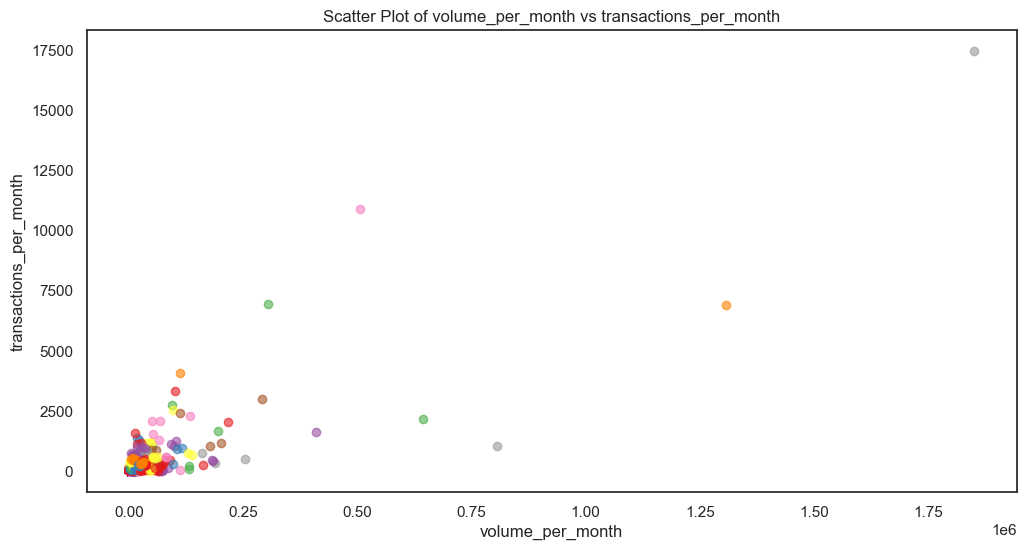

In [8]:
features = df_k[['volume_per_month', 'transactions_per_month']]
customer_ids = df_k['customer_id']

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=100, random_state=42)
df_k['cluster'] = kmeans.fit_predict(features_scaled)

feature_columns = [x for x in features.columns if x != 'cluster']
feature_pairs = list(itertools.combinations(feature_columns, 2))

for x_feature, y_feature in feature_pairs:
    plt.figure(figsize=(12, 6))
    for cluster in df_k['cluster'].unique():
        clustered_data = df_k[df_k['cluster'] == cluster]
        plt.scatter(clustered_data[x_feature], clustered_data[y_feature], label=f'Cluster {cluster}', alpha=0.6)
    
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.title(f'Scatter Plot of {x_feature} vs {y_feature}')
    # plt.legend()
    plt.show()

In [9]:
df_k.groupby('cluster').count()['customer_id'].sort_values(ascending=False).head(10)

cluster
3     5461
39    1562
54     651
85     468
94     286
55     233
51     172
83     160
66     120
34     110
Name: customer_id, dtype: int64

In [10]:
list(
    df_k
    .groupby('cluster')
    .count()['customer_id']
    .sort_values(ascending=False)
    .head(10)
    .index
)

[3, 39, 54, 85, 94, 55, 51, 83, 66, 34]

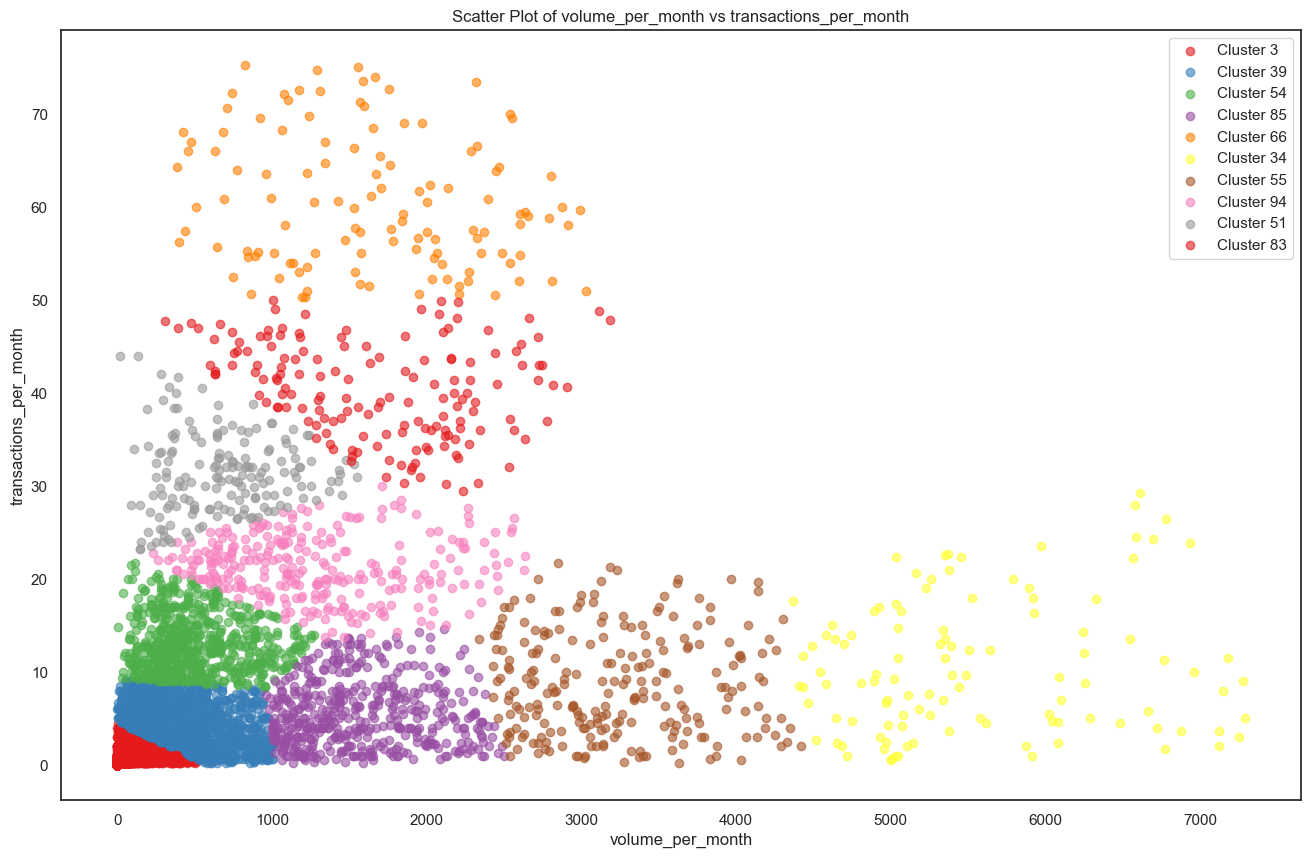

In [14]:
_df = (
    df_k
    [
        df_k.cluster.isin(
            list(
                df_k
                .groupby('cluster')
                .count()['customer_id']
                .sort_values(ascending=False)
                .head(10)
                .index
            )
        )
    ]
)

plt.figure(figsize=(16, 10))
for c in _df.cluster.unique():
    d = _df[_df.cluster == c]
    plt.scatter(d.volume_per_month, d.transactions_per_month, label=f'Cluster {c}', alpha=0.6)
    
plt.xlabel('volume_per_month')
plt.ylabel('transactions_per_month')
plt.title(f'Scatter Plot of volume_per_month vs transactions_per_month')
plt.legend()
plt.show()

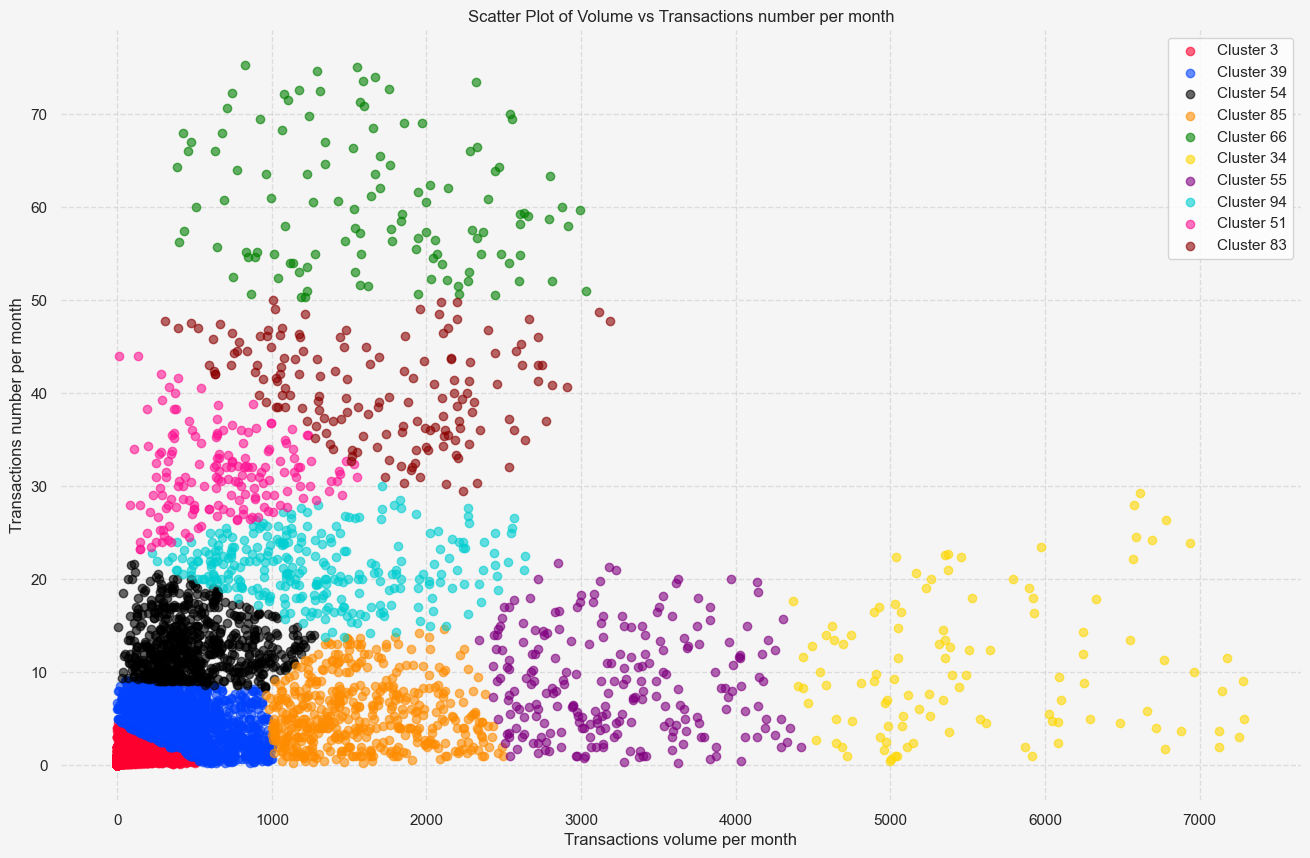

In [16]:
_df = (
    df_k
    [
        df_k.cluster.isin(
            list(
                df_k
                .groupby('cluster')
                .count()['customer_id']
                .sort_values(ascending=False)
                .head(10)
                .index
            )
        )
    ]
)

colors = ['#FF002E', '#0040FF', '#000000', '#FF8C00', '#008000', '#FFD700', 
          '#800080', '#00CED1', '#FF1493', '#8B0000', '#7FFF00', '#00BFFF']
plt.figure(figsize=(16, 10), facecolor='#F5F5F5')
ax = plt.gca()
ax.set_facecolor('#F5F5F5')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.grid(True, linestyle='--', alpha=0.6)

for i, c in enumerate(_df.cluster.unique()):
    d = _df[_df.cluster == c]
    plt.scatter(
        d.volume_per_month, 
        d.transactions_per_month, 
        label=f'Cluster {c}', 
        alpha=0.6, 
        color=colors[i % len(colors)]
    )
    
plt.xlabel('Transactions volume per month')
plt.ylabel('Transactions number per month')
plt.title(f'Scatter Plot of Volume vs Transactions number per month')
plt.legend()
plt.show()

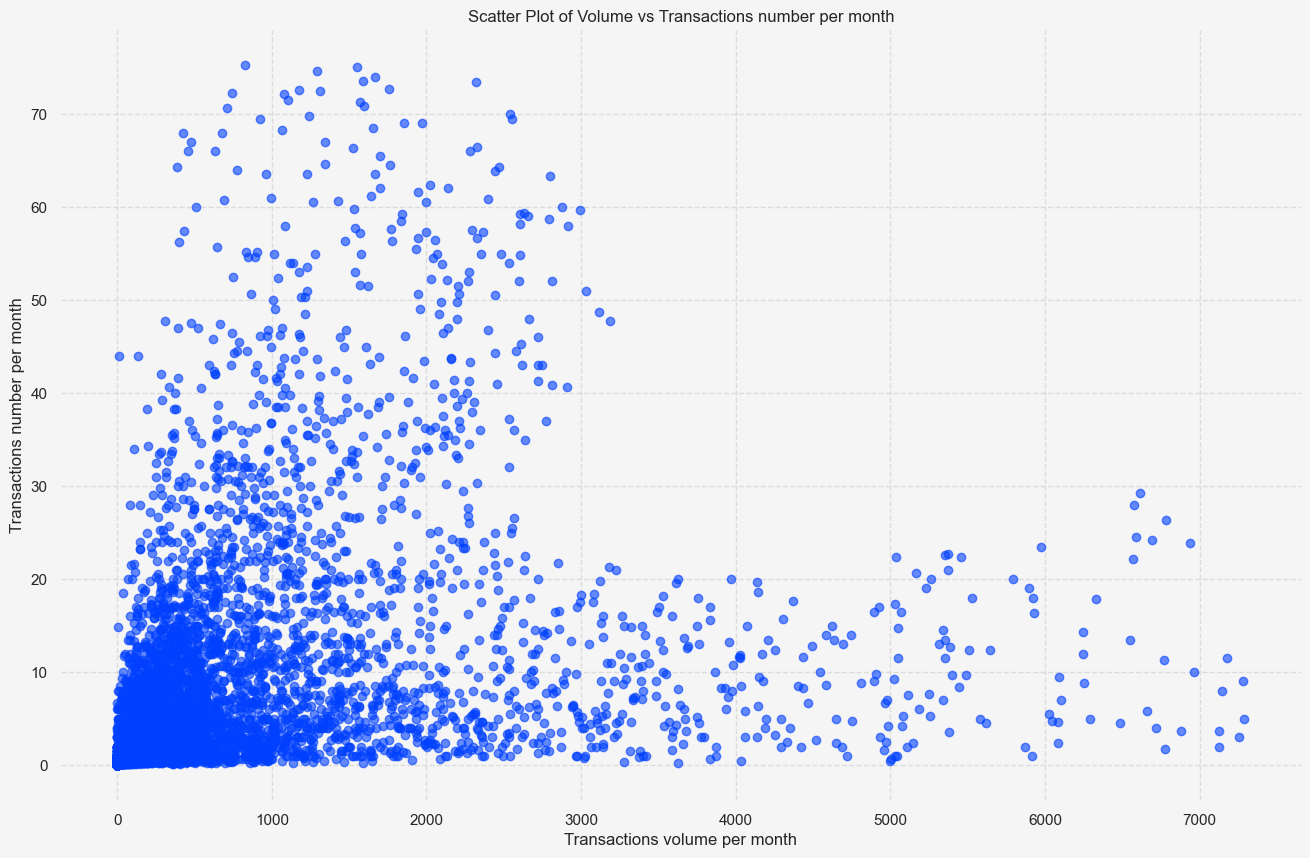

In [18]:
_df = (
    df_k
    [
        df_k.cluster.isin(
            list(
                df_k
                .groupby('cluster')
                .count()['customer_id']
                .sort_values(ascending=False)
                .head(10)
                .index
            )
        )
    ]
)

colors = ['#FF002E', '#0040FF', '#000000', '#FF8C00', '#008000', '#FFD700', 
          '#800080', '#00CED1', '#FF1493', '#8B0000', '#7FFF00', '#00BFFF']
plt.figure(figsize=(16, 10), facecolor='#F5F5F5')
ax = plt.gca()
ax.set_facecolor('#F5F5F5')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.grid(True, linestyle='--', alpha=0.6)

for i, c in enumerate(_df.cluster.unique()):
    d = _df[_df.cluster == c]
    plt.scatter(
        d.volume_per_month, 
        d.transactions_per_month, 
        # label=f'Cluster {c}', 
        alpha=0.6, 
        color=colors[1]
    )
    
plt.xlabel('Transactions volume per month')
plt.ylabel('Transactions number per month')
plt.title(f'Scatter Plot of Volume vs Transactions number per month')
# plt.legend()
plt.show()